# CS229: Naive Bayes

In this notebook we implement the Naive Bayes algorithm described in Lecture 5 for text classification and test it on a public dataset of SMS messages.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cross_validation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_curve

In [2]:
messages = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None, names=['label', 'text'])

In [3]:
messages.iloc[0].text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
cv = CountVectorizer()
X = cv.fit_transform(messages[['text']].as_matrix().ravel()).todense()
y = (messages[['label']] == 'spam').as_matrix().ravel().astype(int)

In [5]:
X_example = cv.transform(['crazy crazy how']).todense()

In [6]:
X_example[0].max()

2

In [7]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

In [8]:
p_spam = np.sum(y_train) / y_train.shape[0]
p_ham = 1 - p_spam

In [9]:
# From X_train, choose only those rows (messages) that are labeled as spam.
spam_messages = X_train[y_train.astype(bool)]

# For each word (column), sum over all rows.
spam_counts = np.sum(spam_messages, axis=0)

p_words_spam = np.ravel((spam_counts + 1) / (spam_counts.sum() + 2))

In [10]:
spam_counts.shape

(1, 8713)

In [11]:
ham_messages = X_train[np.logical_not(y_train.astype(bool))]
ham_counts = np.sum(ham_messages, axis=0)
p_words_ham = np.ravel((ham_counts + 1) / (ham_counts.sum() + 2))

In [12]:
def predict(msg):
    msg = np.ravel((msg != 0))
    
    p_x_spam = np.prod(p_words_spam[msg]) * p_spam
    p_x_ham = np.prod(p_words_ham[msg]) * p_ham

    p_x = p_x_spam * p_spam + p_x_ham * p_ham

    p_is_spam = p_x_spam * p_spam / p_x

    return p_is_spam

In [13]:
y_pred = np.apply_along_axis(predict, 1, X_test)

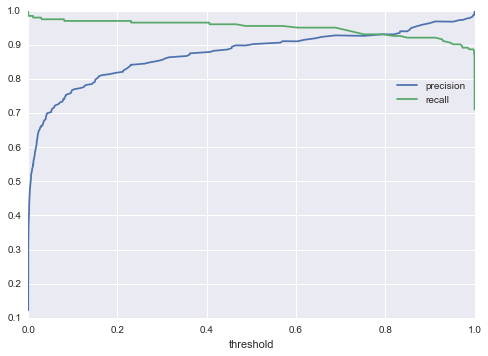

In [14]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure()
ax = plt.subplot(111)

plt.xlabel('threshold')
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')

ax.legend(bbox_to_anchor=(1.0, 0.8))
plt.show()

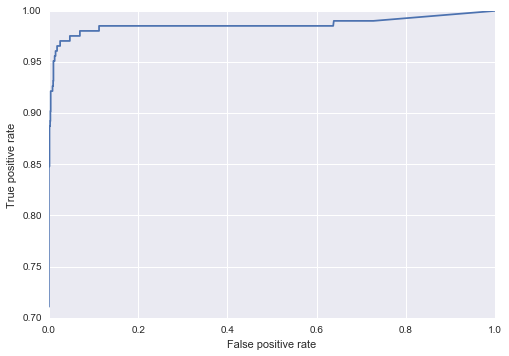

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()
ax = plt.subplot(111)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fpr, tpr)
plt.show()

In [16]:
def is_spam(msg):
    if predict(msg) > 0.2:
        return 1
    else:
        return 0

In [17]:
y_pred = np.apply_along_axis(is_spam, 1, X_test)

In [18]:
print("Spam precision: {0:.1f}%".format(precision_score(y_pred, y_test) * 100))
print("Spam recall: {0:.1f}%".format(recall_score(y_pred, y_test) * 100))

Spam precision: 97.1%
Spam recall: 82.2%


In [19]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_pred, y_test)

0.87715491504995469

In [20]:
def is_spam_text(text):
    x = np.ravel(cv.transform([text]).todense())
    return predict(x)

$$ p(spam|x) = \frac{p(x|spam) p(spam)}{p(x)} $$